# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fauzan Andriana Rachman
- Email: fauzanrachman05@gmail.com
- Id Dicoding: fauzanandrianar

## Persiapan

### Menyiapkan library yang dibutuhkan

### Tahapan Persiapan Data

Tahapan persiapan data diawali dengan mengimpor berbagai library utama yang digunakan dalam analisis dan pemodelan. Library seperti `pandas` dan `numpy` digunakan untuk manipulasi data, sedangkan `matplotlib` dan `seaborn` digunakan untuk visualisasi. Selain itu, digunakan juga beberapa modul dari `scikit-learn` seperti `train_test_split`, `LabelEncoder`, `StandardScaler`, dan `LogisticRegression` untuk keperluan praproses dan pembentukan model. Library `joblib` digunakan untuk menyimpan model, dan `files` dari `google.colab` digunakan untuk mengelola file di Google Colab.

Setelah semua library diimpor, dataset akan dibaca dari sumber yang tersedia dan disimpan ke dalam sebuah DataFrame untuk diproses lebih lanjut.


In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


### Menyiapkan data yang akan diguankan

In [2]:
# Load data
data = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"
df = pd.read_csv(data)


In [3]:
df.head()

,Marital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [4]:
import pandas as pd

# Ganti 'namafile.csv' sesuai nama file yang kamu upload
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv', delimiter=';', encoding='utf-8-sig')


## Data Understanding

### Data Understanding

Tahapan pemahaman data (data understanding) diawali dengan menampilkan beberapa baris pertama menggunakan `df.head()` dan mengevaluasi struktur dataset melalui `df.info()` untuk melihat jumlah entri, tipe data, serta informasi non-null dari setiap kolom.

Selanjutnya, dilakukan pemeriksaan nilai yang hilang menggunakan `df.isnull().sum()` serta deteksi baris duplikat dengan `df.duplicated()` untuk menjaga kualitas dan kebersihan data.

Distribusi nilai dari masing-masing fitur diperiksa untuk mengetahui variasi dan jumlah kemunculan tiap kategori. Informasi dasar lain seperti jumlah baris dan kolom (`df.shape`) serta daftar nama kolom juga ditampilkan untuk memberi gambaran menyeluruh terhadap struktur dataset.

Distribusi dari variabel target `Status` dianalisis, baik dalam bentuk angka maupun visualisasi, guna melihat proporsi antara mahasiswa yang dropout, lulus, maupun masih aktif. Hal ini penting untuk memahami potensi ketidakseimbangan kelas dalam data.

Fitur-fitur kategorikal seperti `Gender`, `Scholarship_holder`, `Displaced`, `Debtor`, `Tuition_fees_up_to_date`, dan `International` kemudian divisualisasikan terhadap `Status` menggunakan `countplot`, agar dapat melihat bagaimana distribusi masing-masing kategori berhubungan dengan status mahasiswa.

Selanjutnya, fitur numerik dianalisis menggunakan boxplot berdasarkan `Status`, untuk mengamati perbedaan distribusi nilai antar kelas target dan mengidentifikasi potensi outlier atau tren awal.

Terakhir, dilakukan analisis korelasi antar fitur numerik melalui heatmap korelasi. Hal ini bertujuan untuk melihat sejauh mana fitur-fitur tersebut saling berkaitan dan mendeteksi kemungkinan multikolinearitas yang dapat memengaruhi performa model.


In [5]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:

# Cek apakah ada nilai kosong
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [8]:
# Cek apakah ada baris duplikat
duplicate_rows = df[df.duplicated()]
print(f"Jumlah data duplikat: {duplicate_rows.shape[0]}")

Jumlah data duplikat: 0


In [9]:
for i in (df.columns):
    print(df[i].value_counts())

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, d

In [10]:

# Setup visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [11]:

# 3. Lihat struktur dasar
print("📊 Ukuran data:", df.shape)
print("\n🧾 Kolom-kolom:")
print(df.columns.tolist())

📊 Ukuran data: (4424, 37)

🧾 Kolom-kolom:
['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']



🎯 Distribusi Status:
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


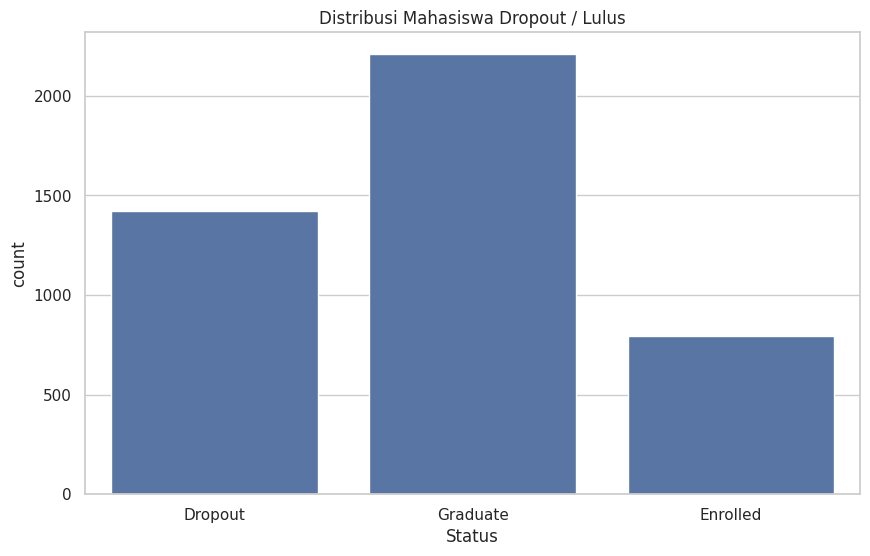

In [12]:

# 6. Distribusi target (Status)
print("\n🎯 Distribusi Status:")
print(df['Status'].value_counts(normalize=True) * 100)
sns.countplot(x='Status', data=df)
plt.title('Distribusi Mahasiswa Dropout / Lulus')
plt.show()

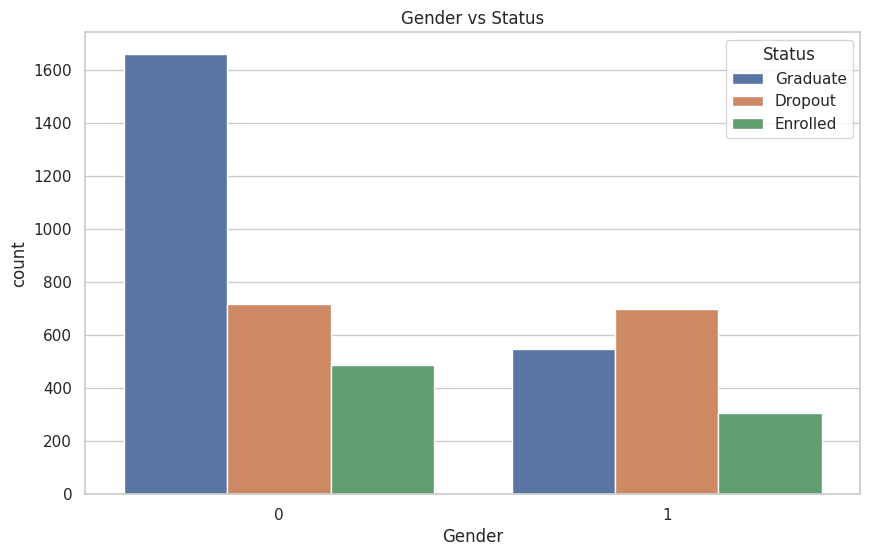

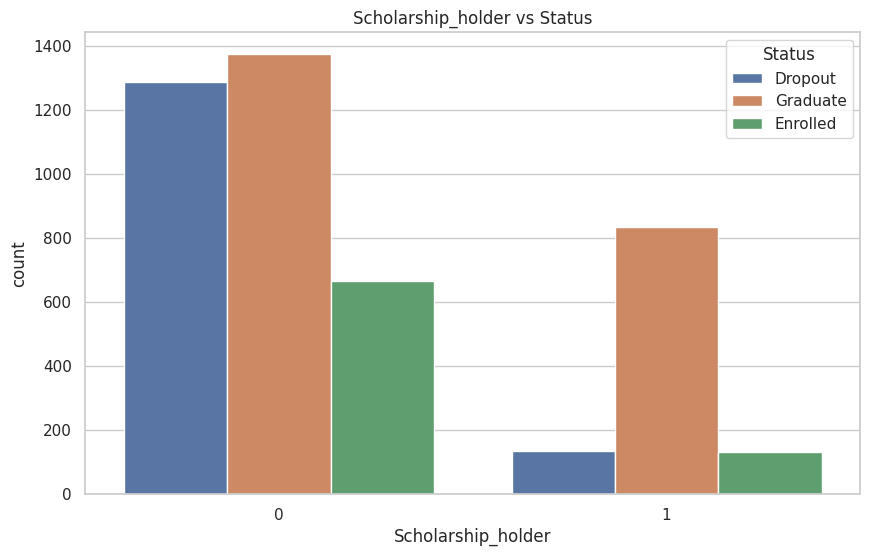

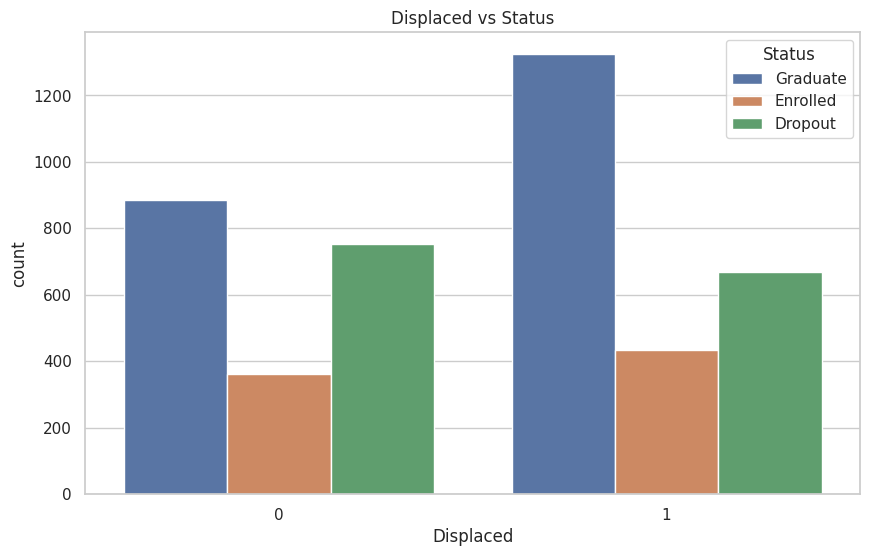

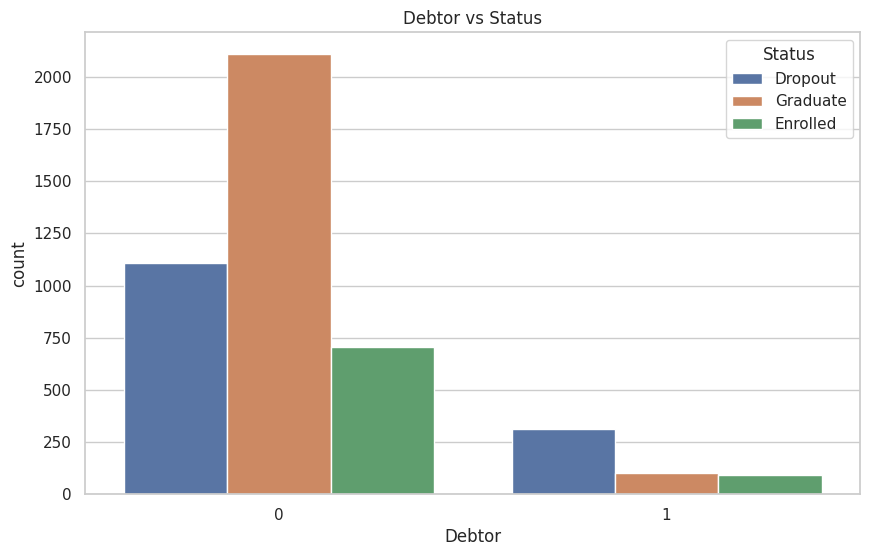

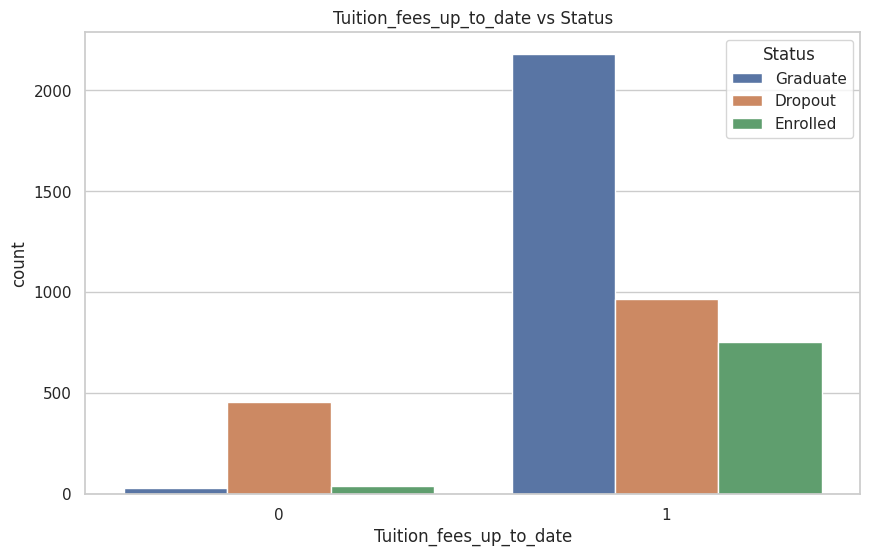

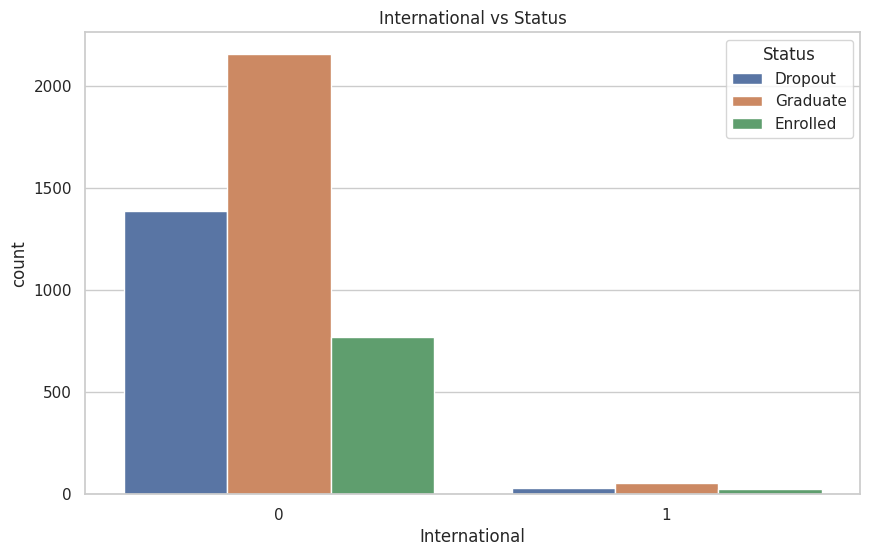

In [13]:

# 8. Visualisasi data kategorikal vs Status
categorical_cols = ['Gender', 'Scholarship_holder', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'International']
for col in categorical_cols:
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='Status')
        plt.title(f'{col} vs Status')
        plt.show()

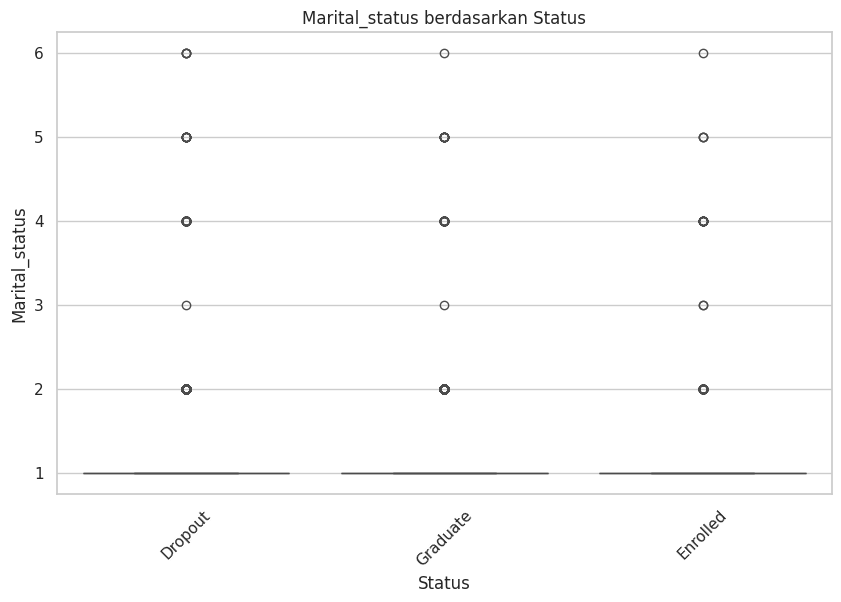

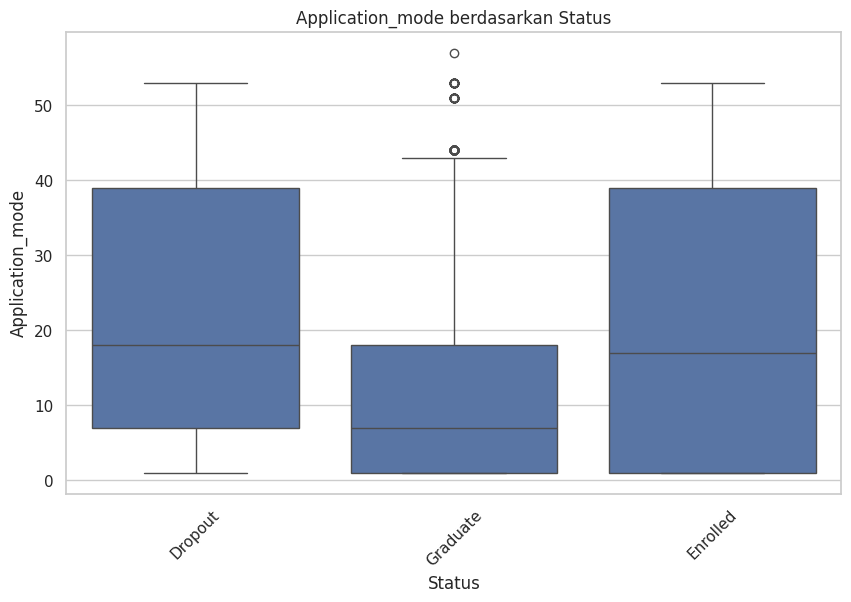

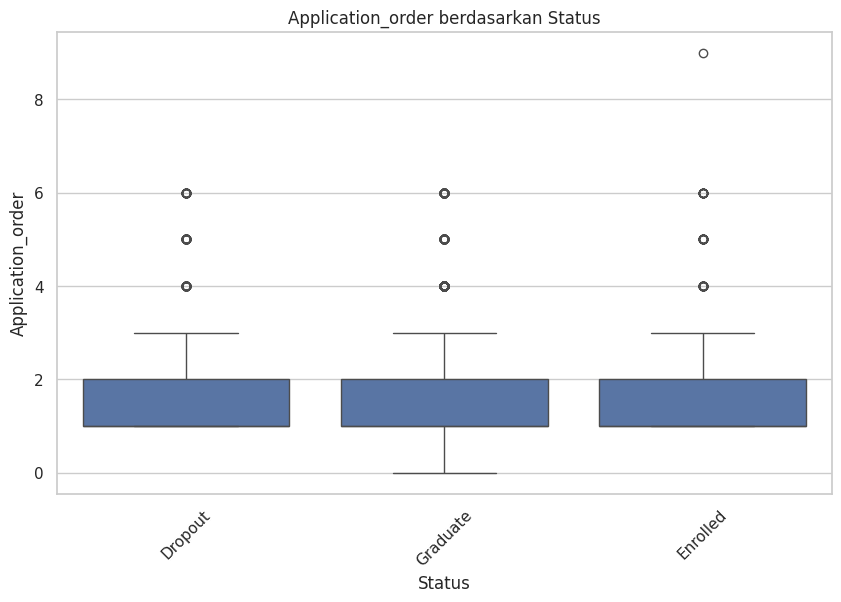

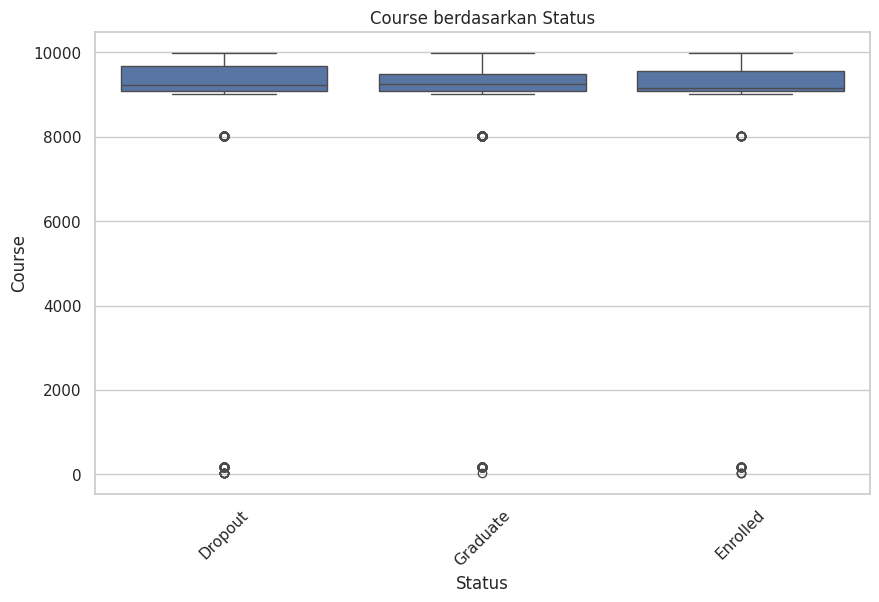

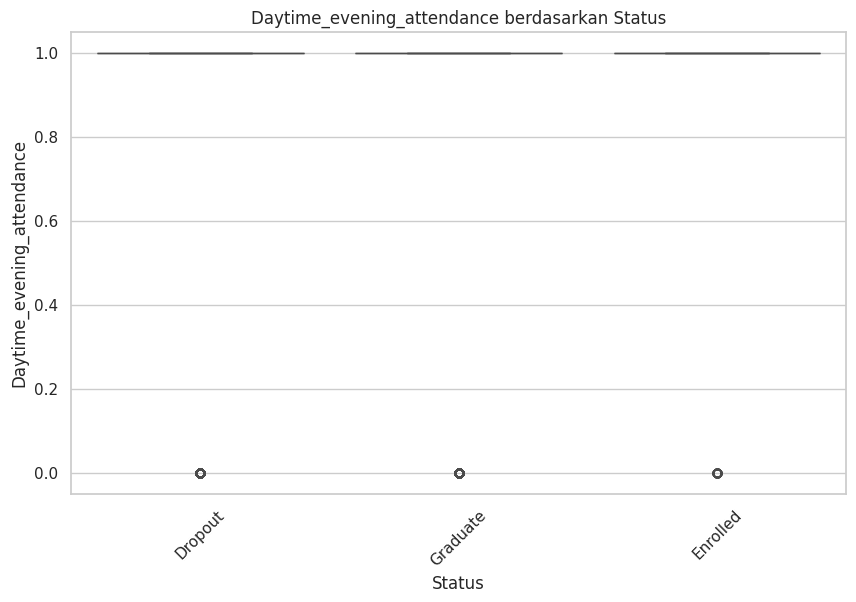

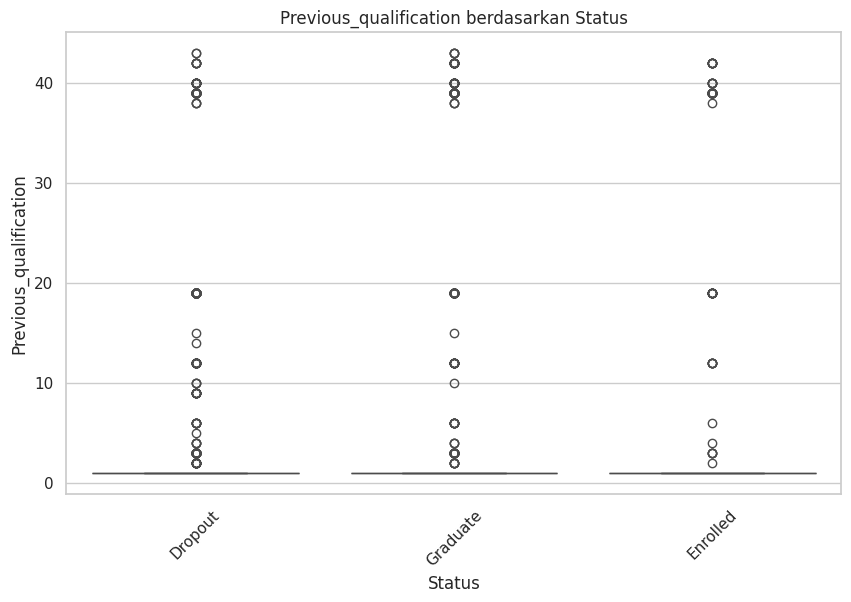

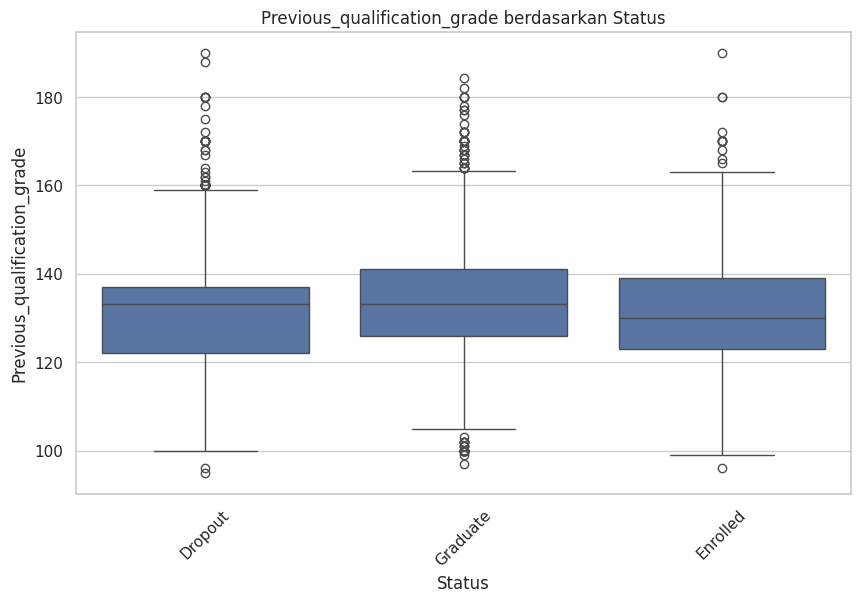

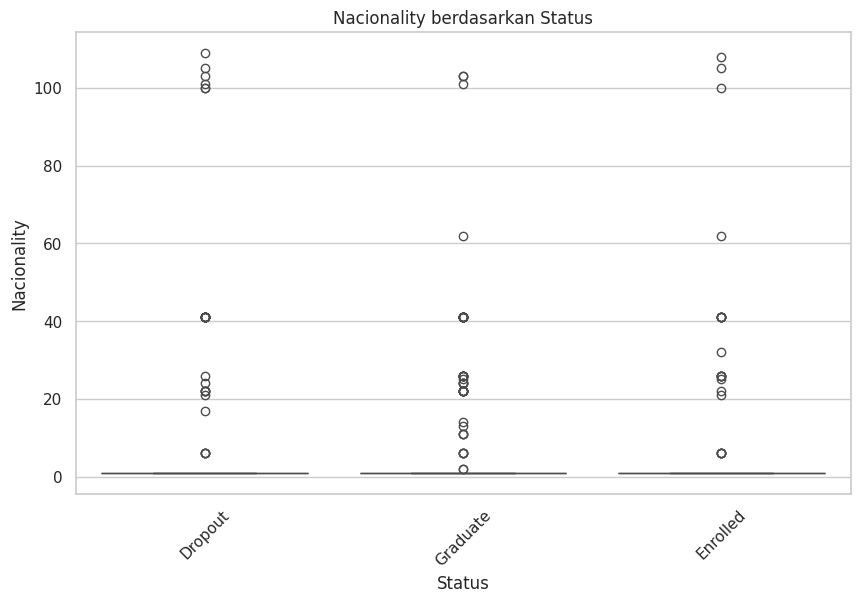

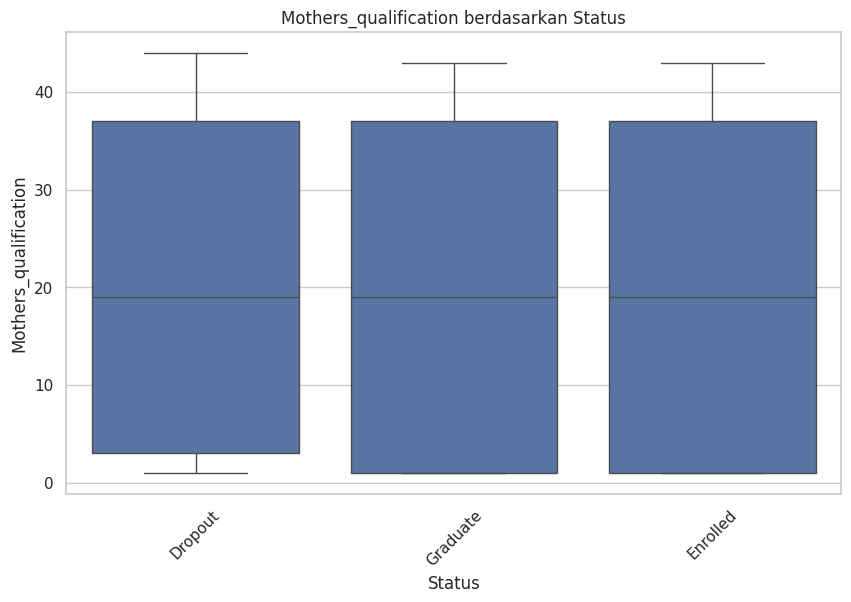

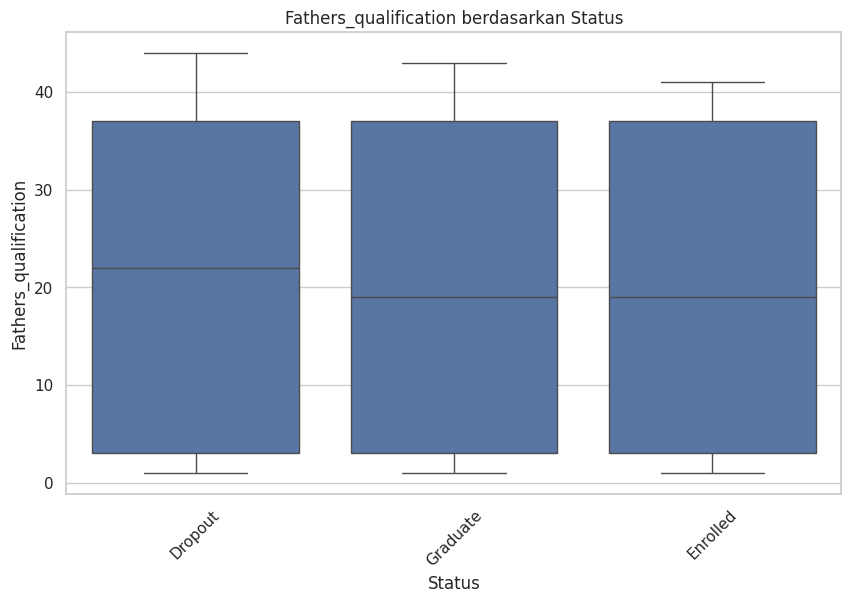

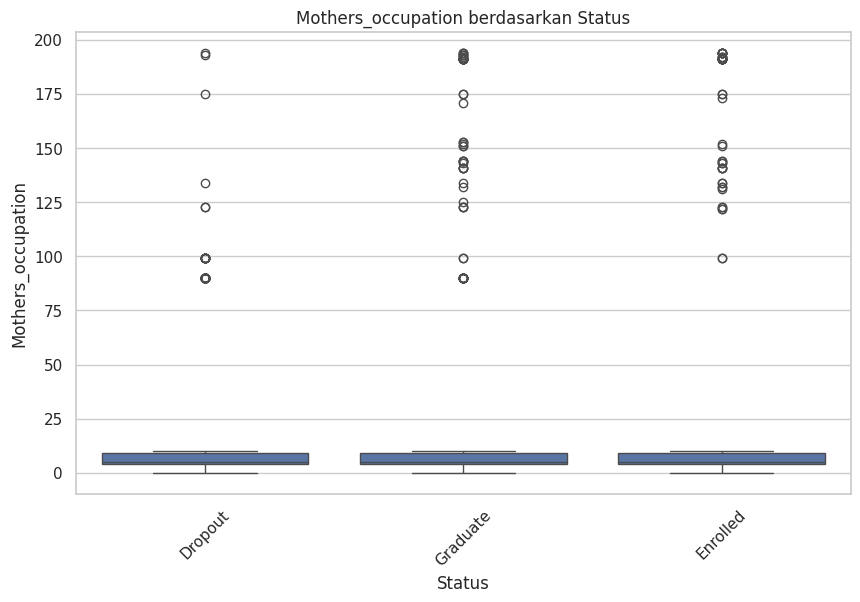

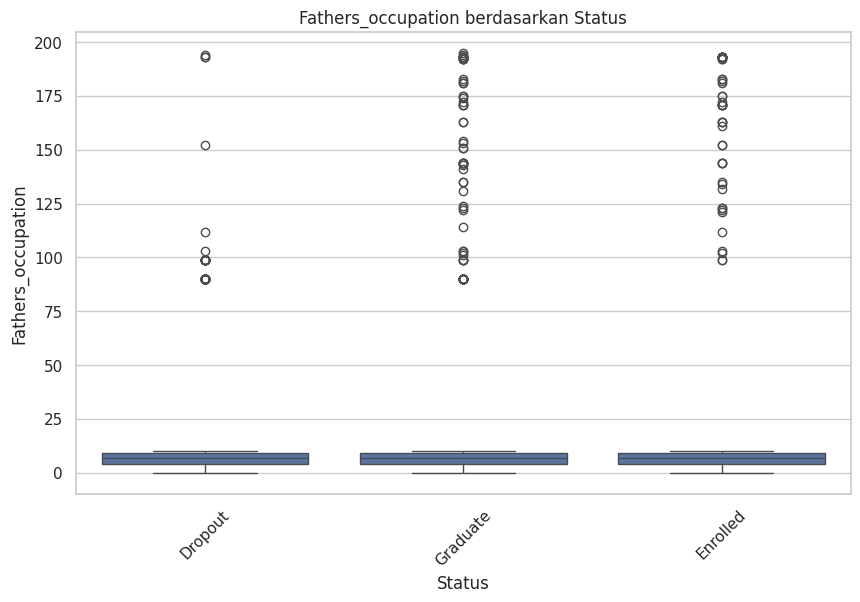

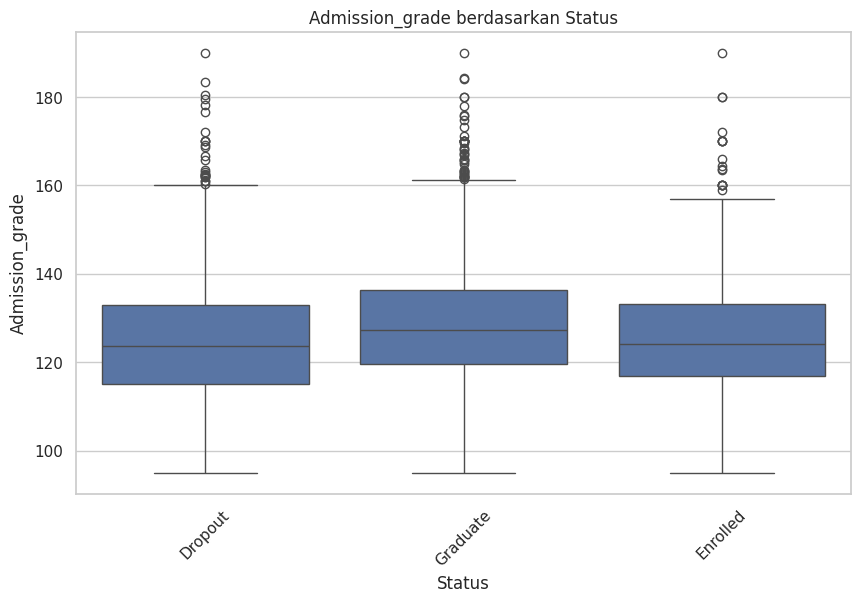

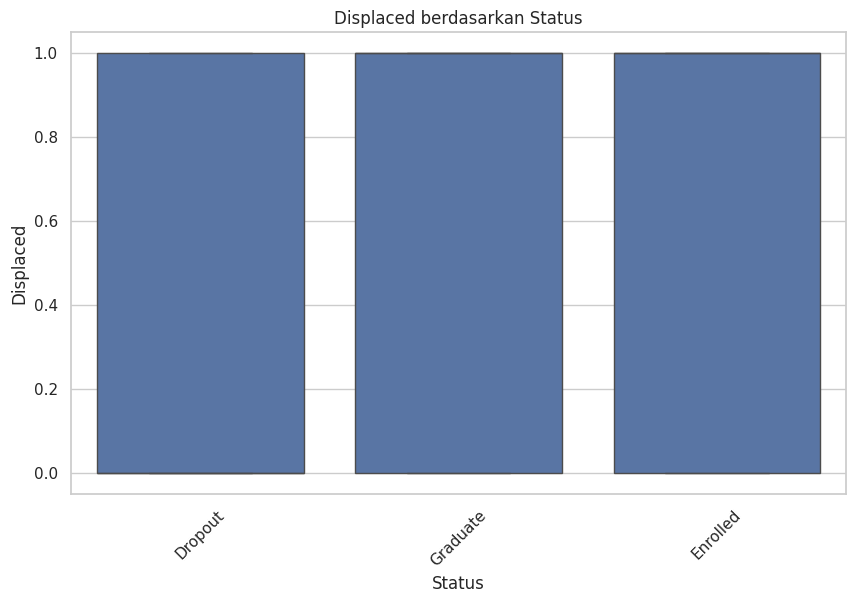

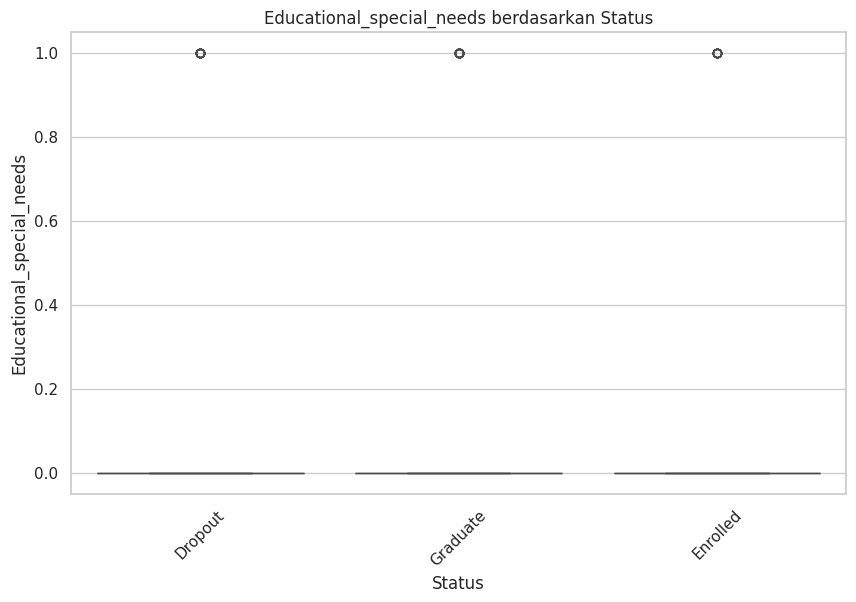

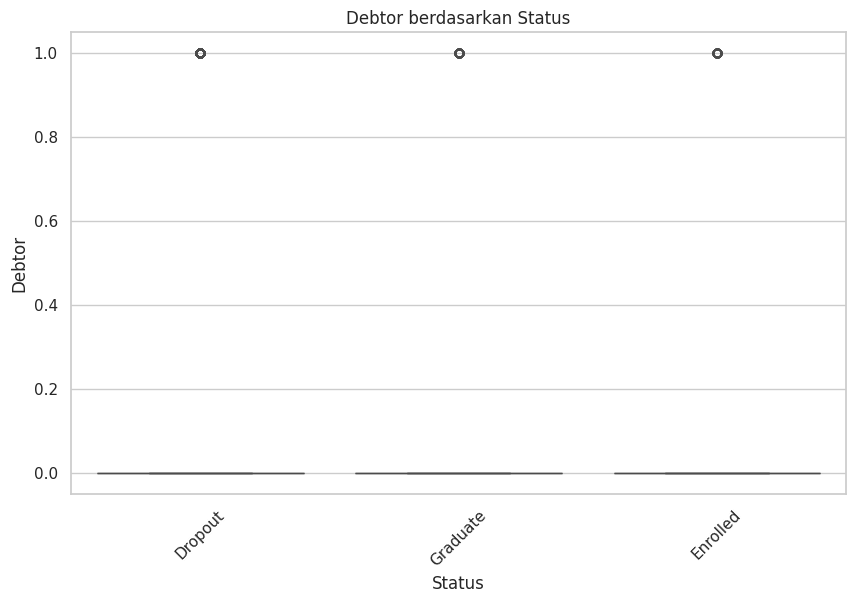

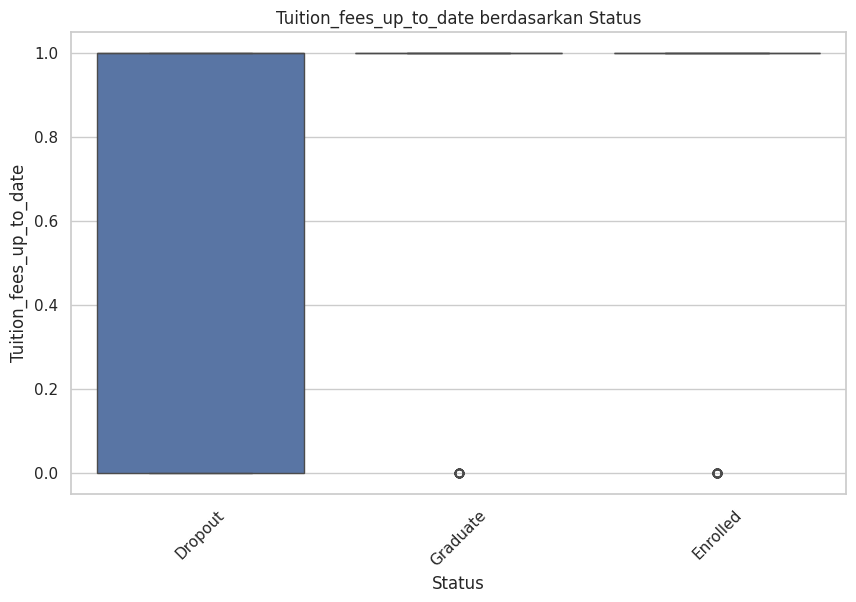

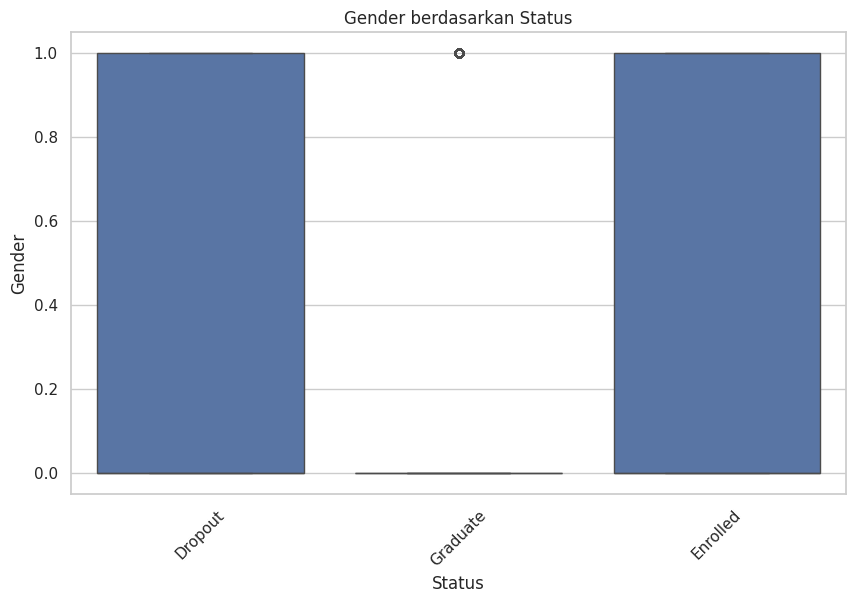

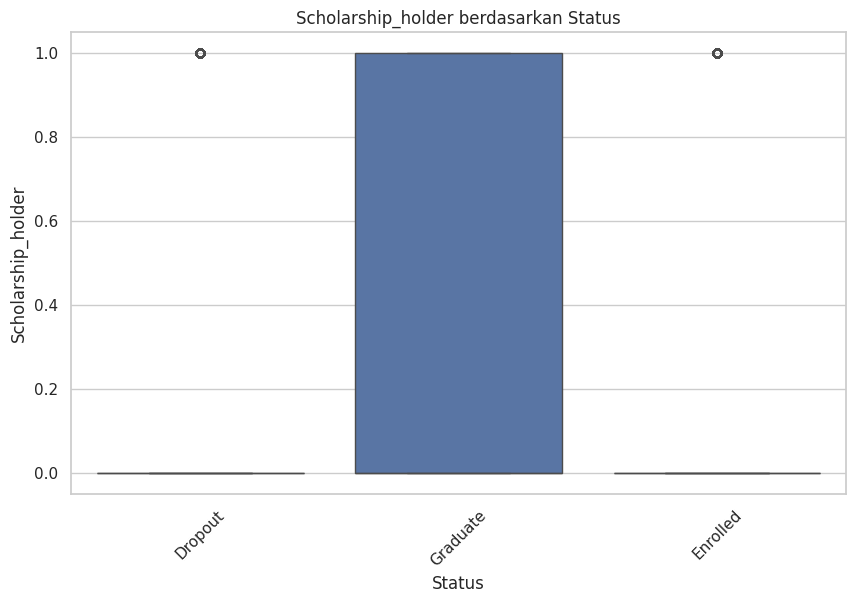

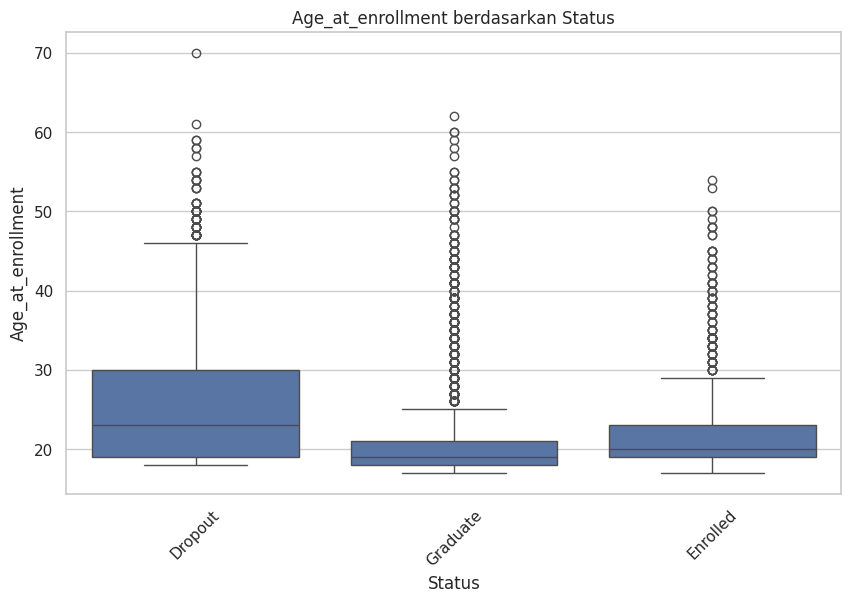

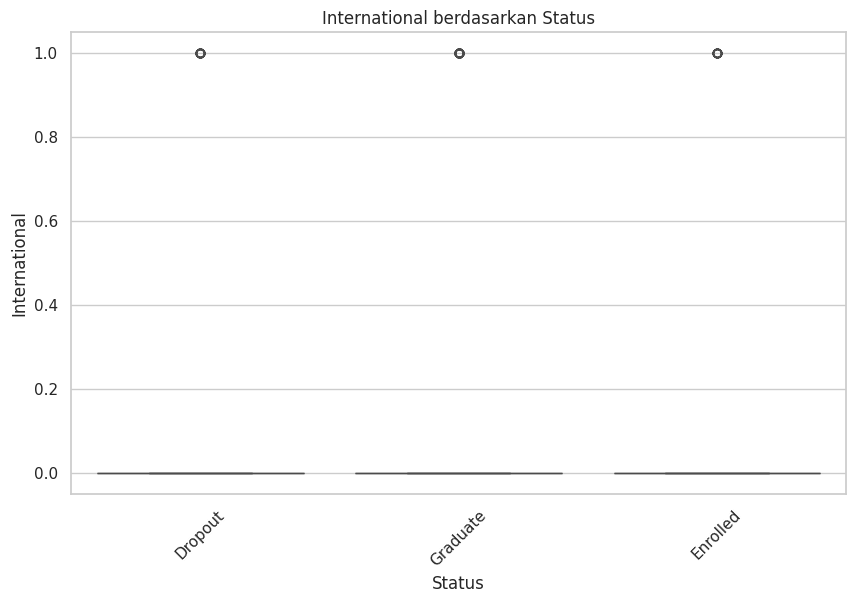

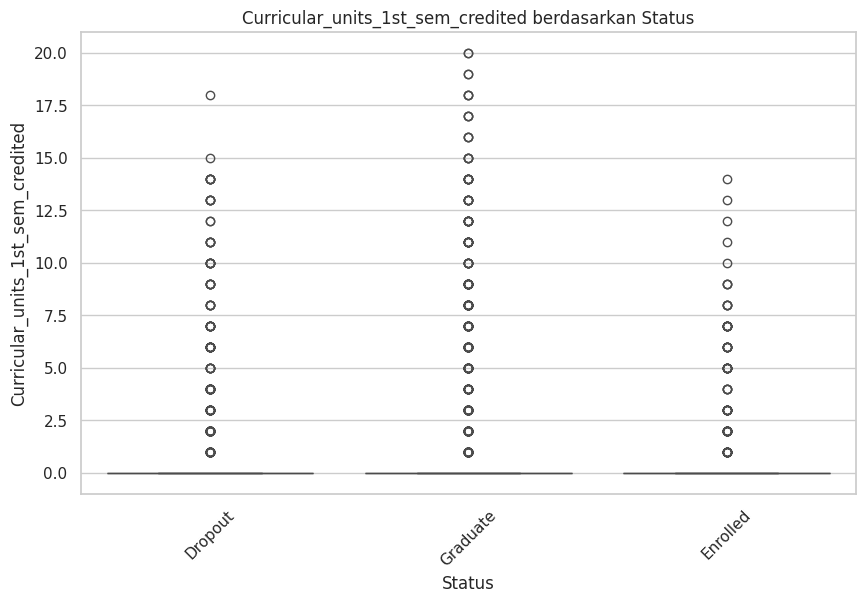

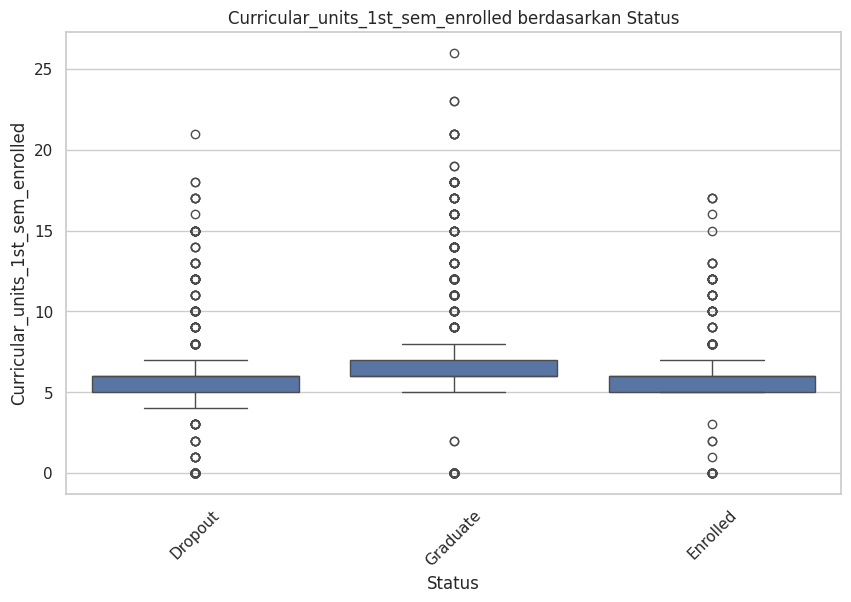

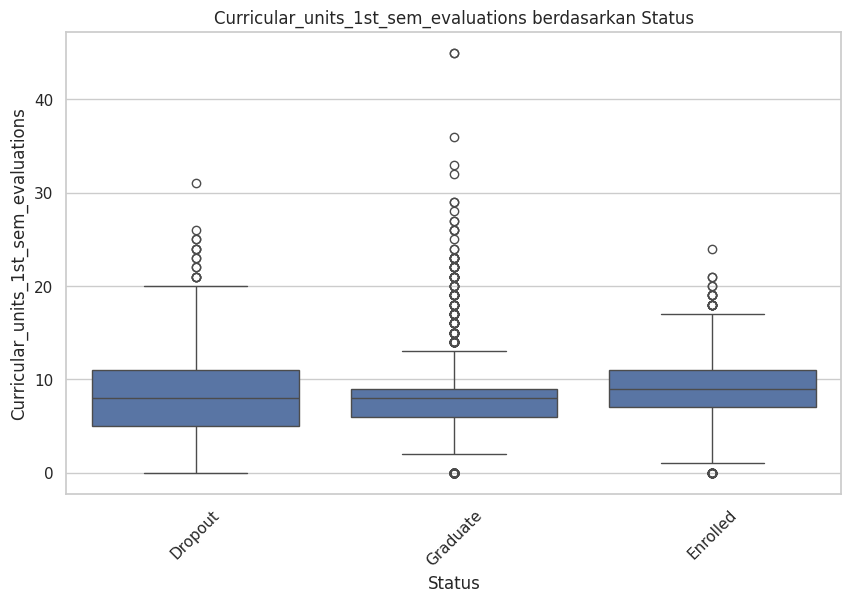

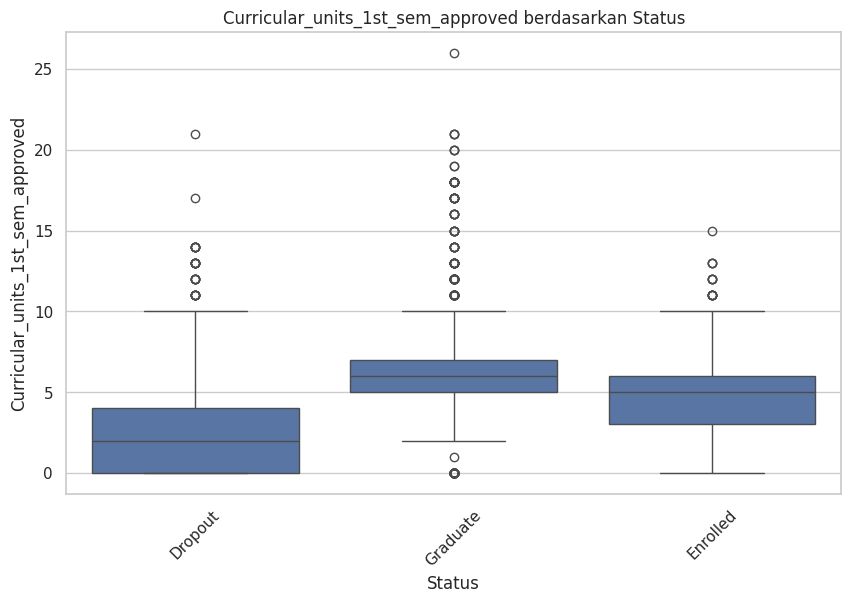

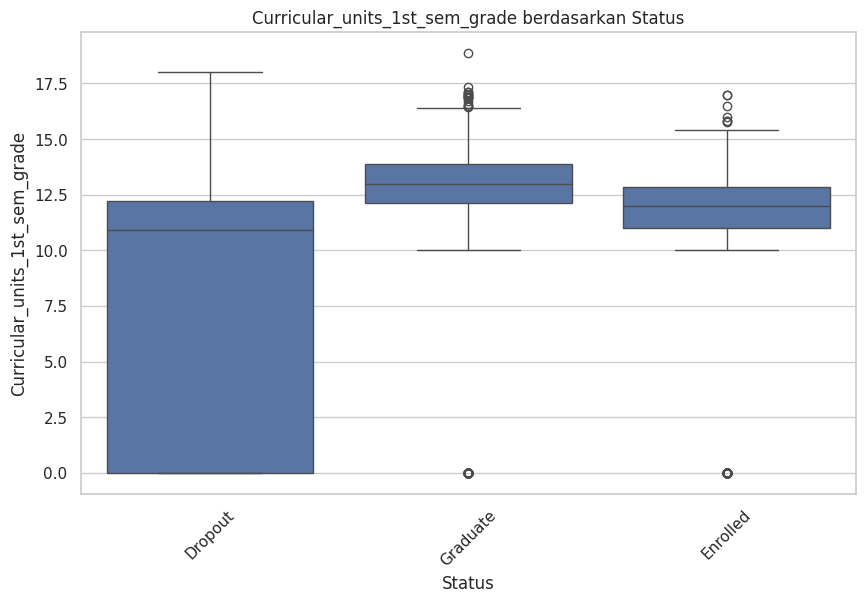

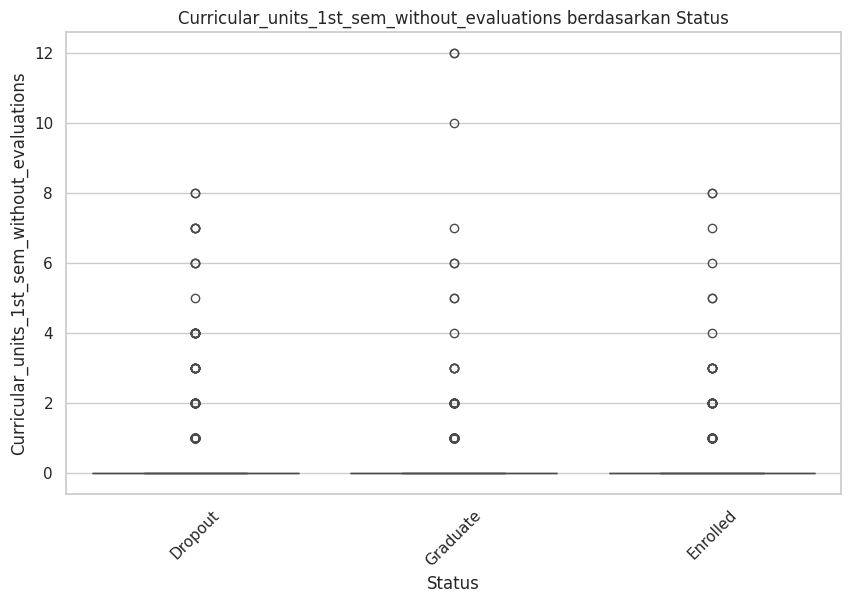

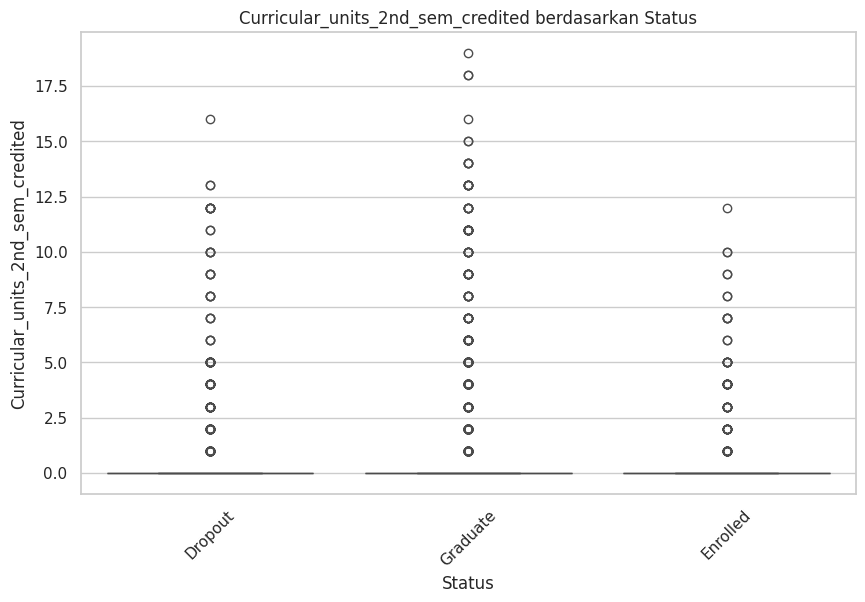

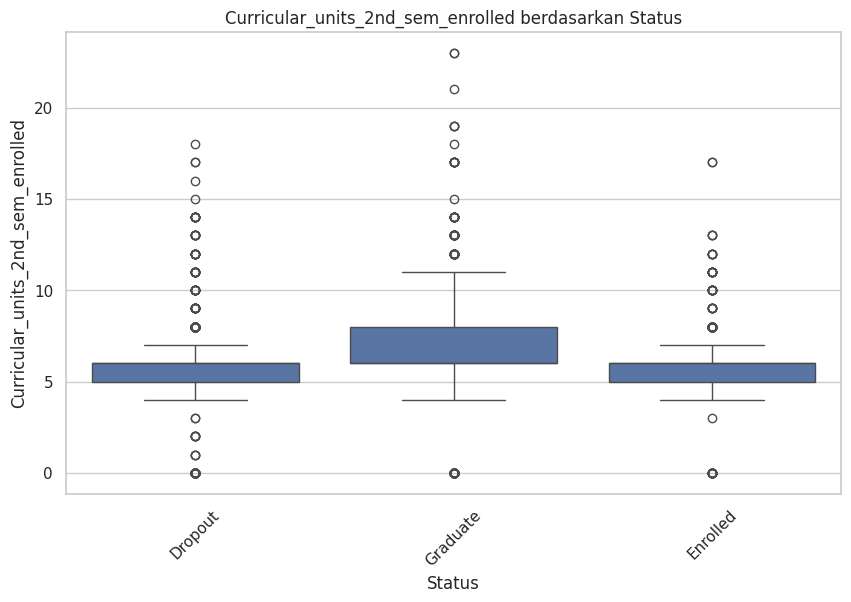

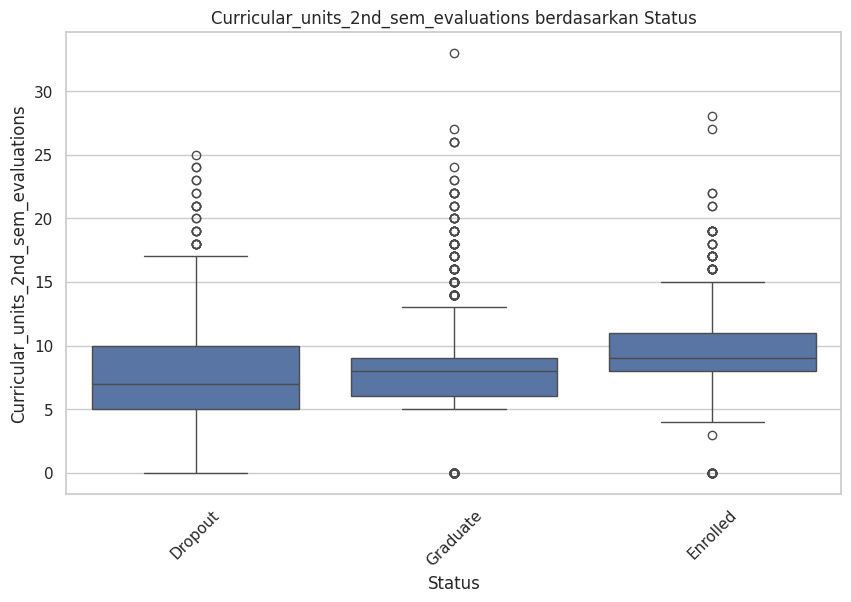

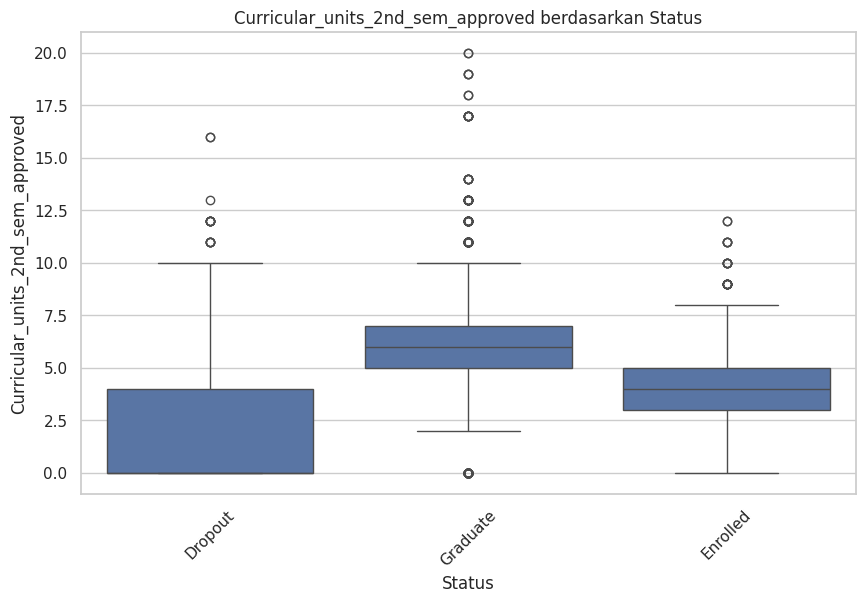

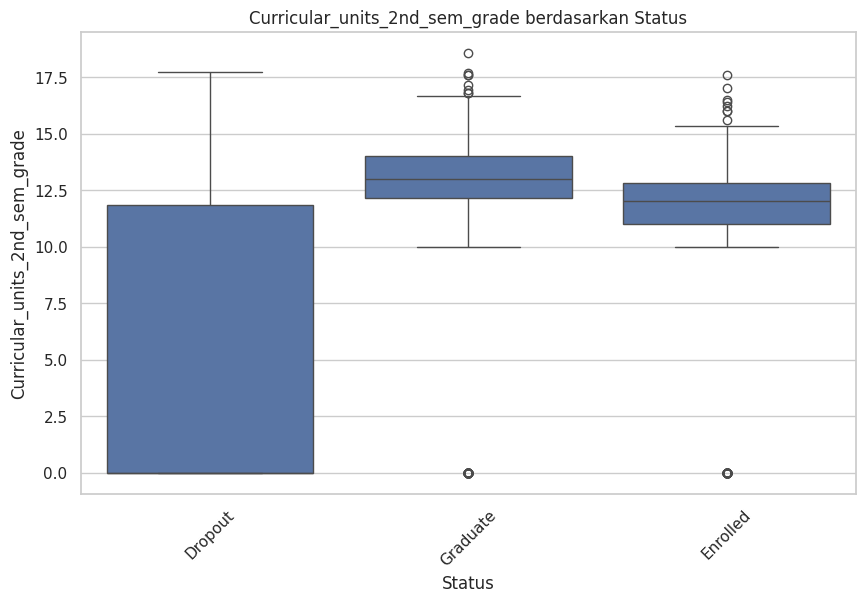

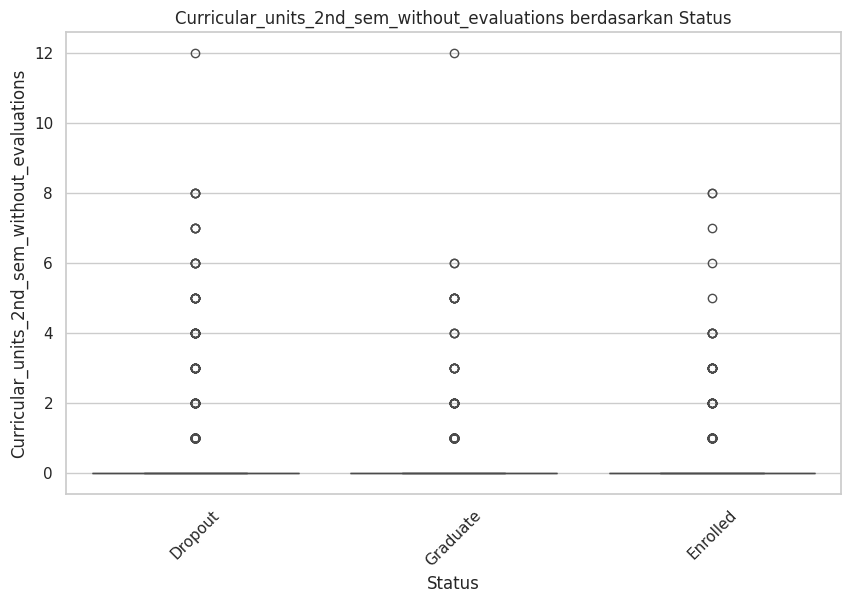

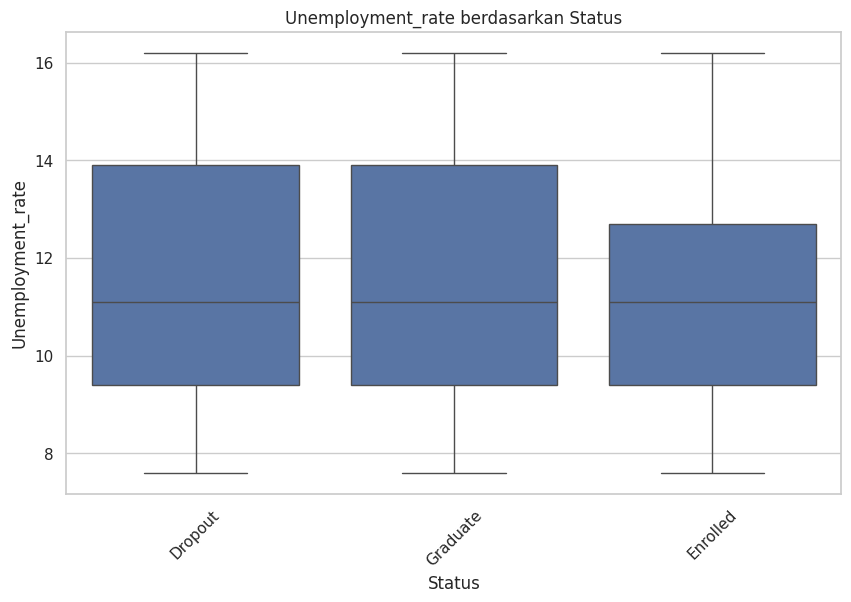

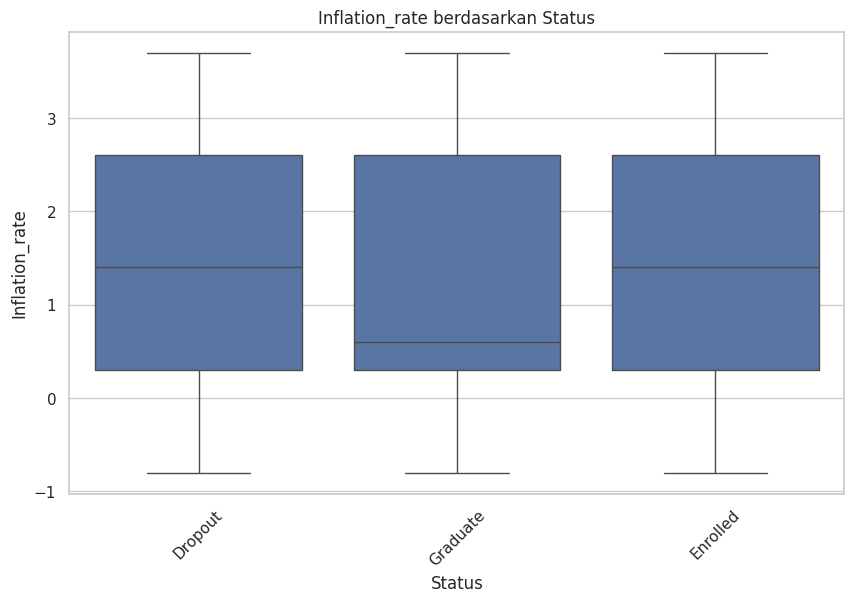

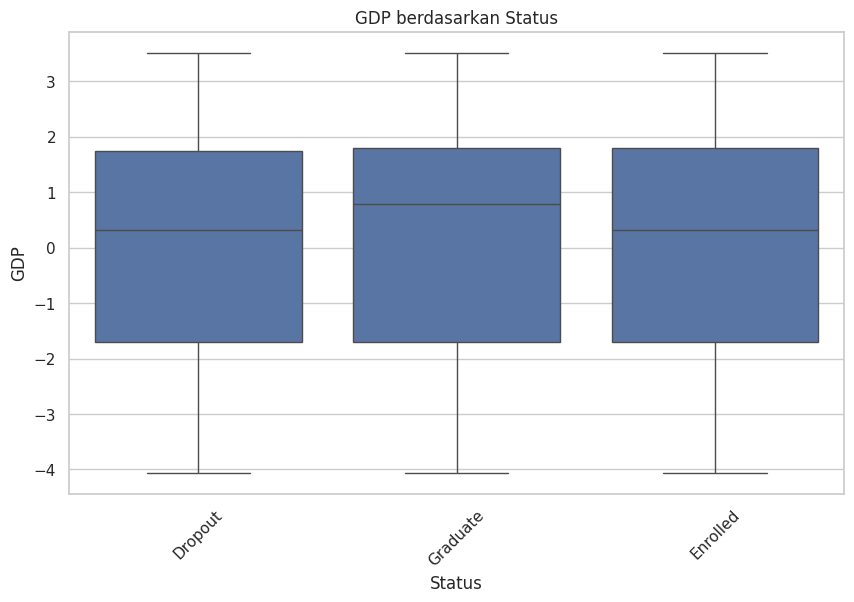

In [14]:
# 9. Visualisasi numerik dengan boxplot berdasarkan Status
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    sns.boxplot(data=df, x='Status', y=col)
    plt.title(f'{col} berdasarkan Status')
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


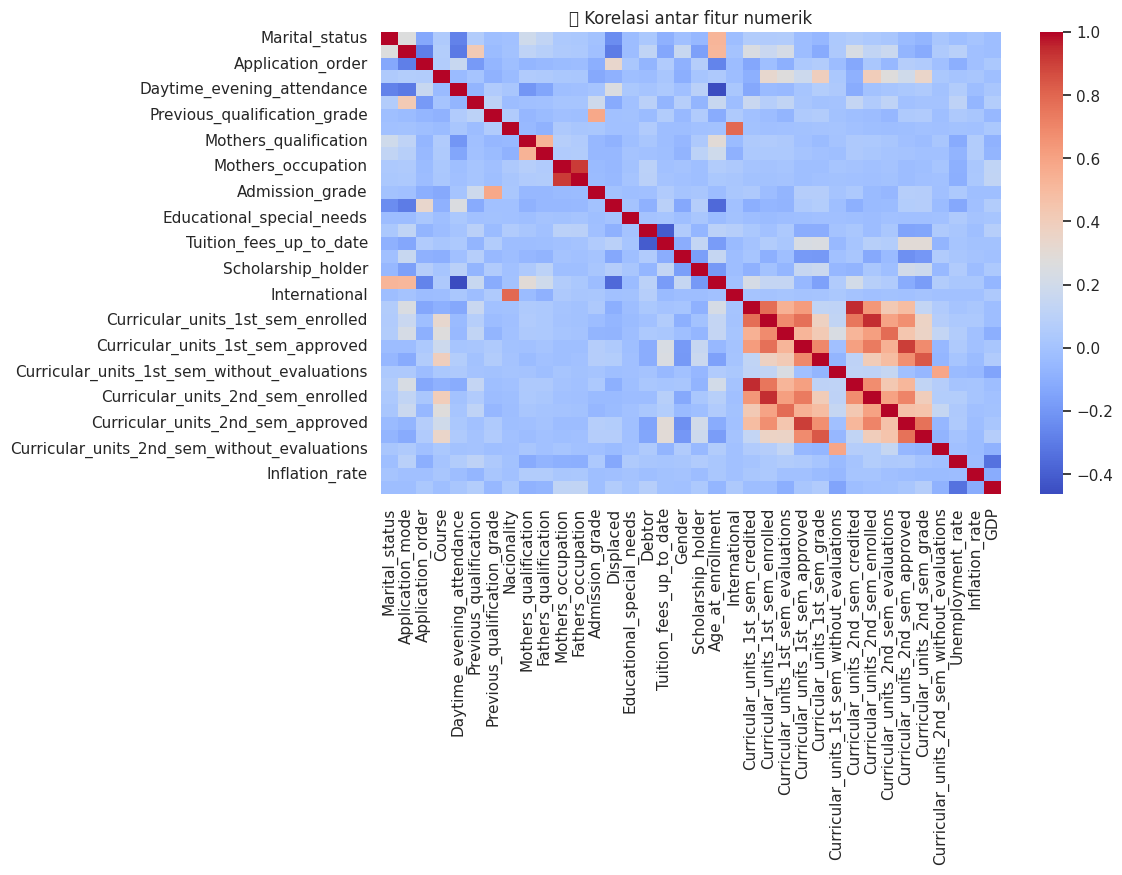

In [15]:

# 10. Korelasi antar fitur numerik
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("📌 Korelasi antar fitur numerik")
plt.show()

## Data Preparation / Preprocessing

### Data Preprocessing

Tahapan preprocessing diawali dengan mengecek distribusi nilai pada kolom `Status` untuk memahami proporsi masing-masing kelas target. Karena fokus prediksi diarahkan pada kasus mahasiswa yang dropout, maka label dikonversi menjadi biner: `Dropout` diberi nilai 1, sementara kategori lainnya (`Graduate` dan `Enrolled`) diberi nilai 0.

Selanjutnya, kolom `Status` yang asli dihapus karena telah diwakili oleh label baru pada kolom `Target`. Dataset kemudian dipisahkan menjadi fitur (`X`) dan target (`y`). Dalam proses ini, fitur yang digunakan adalah seluruh kolom selain `Target`.

Agar seluruh fitur bersifat numerik dan dapat diproses oleh model machine learning, setiap kolom diuji dan dikonversi ke tipe numerik menggunakan `pd.to_numeric`. Setelah itu, proses standardisasi dilakukan dengan `StandardScaler` untuk memastikan setiap fitur memiliki skala yang sama (mean = 0 dan standar deviasi = 1), yang penting dalam banyak algoritma pembelajaran mesin.

Langkah terakhir dalam tahap ini adalah melakukan pembagian data menjadi data latih dan data uji dengan proporsi 80:20 menggunakan fungsi `train_test_split`. Parameter `stratify=y` digunakan agar distribusi kelas target tetap seimbang di kedua subset. Ukuran masing-masing subset ditampilkan untuk memastikan jumlah data yang diperoleh sesuai.


In [16]:
# Cek distribusi status
print(df['Status'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [17]:

# Encode Status: Dropout = 1, lainnya = 0 ( kita fokus prediksi dropout)
df['Target'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [18]:

# Drop kolom Status asli
df.drop('Status', axis=1, inplace=True)

In [19]:
# Pisahkan fitur numerik dan kategorikal
X = df.drop('Target', axis=1)
y = df['Target']

# Pastikan semua kolom numerik, jika ada yang bertipe object, ubah ke int/float
X = X.apply(pd.to_numeric, errors='coerce')  # ubah semua kolom ke numerik


In [20]:
# Standarisasi semua fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert ke DataFrame untuk kejelasan (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [21]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Cek jumlah data
print("Jumlah data train:", X_train.shape[0])
print("Jumlah data test :", X_test.shape[0])


Jumlah data train: 3539
Jumlah data test : 885


## Modeling

### Modelling

Pada tahap ini dilakukan pembuatan model prediksi menggunakan algoritma *Logistic Regression*, yaitu salah satu metode klasifikasi yang umum digunakan untuk memprediksi variabel target biner. Model diinisialisasi dengan parameter `random_state=42` guna memastikan hasil yang reproducible, serta `max_iter=1000` untuk memastikan proses iterasi konvergen jika data memerlukan lebih banyak iterasi.

Setelah inisialisasi, model dilatih menggunakan data latih (`X_train` dan `y_train`) untuk mempelajari hubungan antara fitur-fitur masukan dengan label target. Setelah proses pelatihan selesai, model digunakan untuk melakukan prediksi terhadap data uji (`X_test`) guna menghasilkan label prediksi (`y_pred`) yang akan digunakan pada tahap evaluasi berikutnya.


In [22]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan latih model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [23]:

# Prediksi pada data test
y_pred = model.predict(X_test)


## Evaluation

### Evaluasi Model

Setelah proses prediksi selesai, performa model dievaluasi menggunakan *confusion matrix* dan *classification report*. Confusion matrix digunakan untuk menunjukkan jumlah prediksi benar dan salah yang dilakukan oleh model untuk masing-masing kelas. Visualisasi matrix ini memberikan gambaran yang jelas mengenai jumlah kasus dropout yang berhasil diprediksi dengan benar maupun yang salah klasifikasi.

Selain itu, digunakan juga classification report yang menampilkan metrik evaluasi seperti *precision*, *recall*, *f1-score*, dan *accuracy* untuk masing-masing kelas (`Lulus/Enrolled` dan `Dropout`). Metrik ini memberikan informasi lebih mendalam mengenai seberapa baik model dalam mengklasifikasi tiap kategori, terutama dalam mendeteksi dropout yang menjadi fokus utama.

### Penyimpanan Model

Untuk mempermudah penggunaan model di masa mendatang tanpa perlu melakukan pelatihan ulang, model yang telah dilatih disimpan menggunakan `joblib` dalam format file `.pkl`. Skaler (StandardScaler) yang digunakan untuk standardisasi fitur juga disimpan agar data baru nantinya bisa diproses dengan cara yang konsisten sebelum digunakan untuk prediksi. Kedua file ini dapat di-*load* kembali saat diperlukan untuk prediksi atau integrasi ke sistem lain.


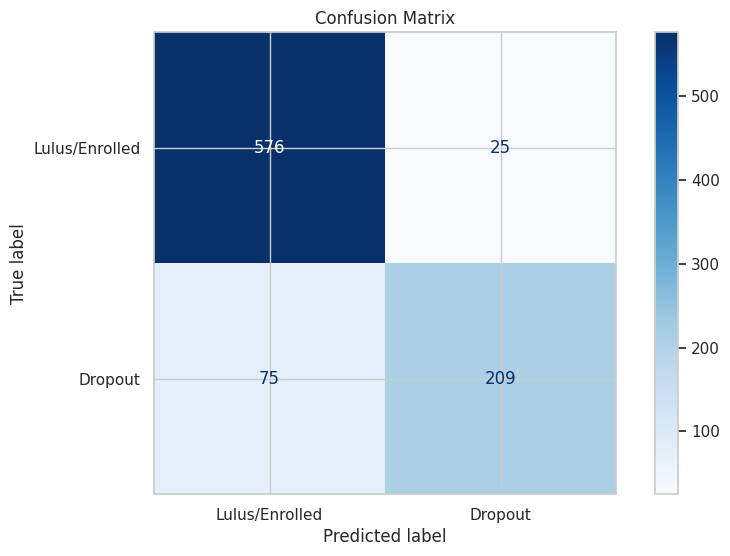

📊 Classification Report:
                precision    recall  f1-score   support

Lulus/Enrolled       0.88      0.96      0.92       601
       Dropout       0.89      0.74      0.81       284

      accuracy                           0.89       885
     macro avg       0.89      0.85      0.86       885
  weighted avg       0.89      0.89      0.88       885



In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lulus/Enrolled", "Dropout"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Lulus/Enrolled", "Dropout"]))


In [25]:
import joblib

# Simpan model dan scaler
joblib.dump(model, 'model_logreg.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model dan Scaler berhasil disimpan!")


✅ Model dan Scaler berhasil disimpan!
